# Rotating cylinders and the possibility of global causality violation by Tipler
##  Geoff Cope
##  Univeristy of Utah
##  December 28, 2021

Here we derive the field equations associated with equation 5 which are listed in the appendix as A1,A2,A3

https://journals.aps.org/prd/abstract/10.1103/PhysRevD.9.2203

In [1]:
from sympy import init_session
init_session(use_latex=True)

IPython console for SymPy 1.9 (Python 3.8.8-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.9/



In [2]:
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

In [3]:
t,r,phi,z,dt,dr,dphi,dz = symbols( 't r phi z dt dr dphi dz' ) 

In [4]:
u = Function('u')(r)
u

In [5]:
a = Function('a')(r)
a

In [6]:
k = Function('k')(r)
k

In [7]:
variables = Matrix( [t,r,phi,z] )
variables

⎡t⎤
⎢ ⎥
⎢r⎥
⎢ ⎥
⎢φ⎥
⎢ ⎥
⎣z⎦

In [8]:
differentials = Matrix( [dt,dr,dphi,dz] ) 
differentials

⎡ dt ⎤
⎢    ⎥
⎢ dr ⎥
⎢    ⎥
⎢dphi⎥
⎢    ⎥
⎣ dz ⎦

In [9]:
lineElement = expand( - exp(2*u) * ( dt + a*dphi )**2 + exp(2*(k-u)) * ( dr**2 + dz**2 ) + r**2 * exp(-2*u) * dphi**2 )
lineElement

In [10]:
g = zeros(4)

for i in range(4):
    for j in range(4):
        if i == j:
            g[i,j] = lineElement.coeff( differentials[i],2 ) 
        else:
            g[i,j] = Rational(1,2)*lineElement.coeff( differentials[i]*differentials[j],1 )
            
g

⎡    2⋅u(r)                                     2⋅u(r)                         ⎤
⎢  -ℯ                  0                 -a(r)⋅ℯ                      0        ⎥
⎢                                                                              ⎥
⎢                2⋅k(r)  -2⋅u(r)                                               ⎥
⎢      0        ℯ      ⋅ℯ                      0                      0        ⎥
⎢                                                                              ⎥
⎢       2⋅u(r)                     2  -2⋅u(r)    2     2⋅u(r)                  ⎥
⎢-a(r)⋅ℯ               0          r ⋅ℯ        - a (r)⋅ℯ               0        ⎥
⎢                                                                              ⎥
⎢                                                               2⋅k(r)  -2⋅u(r)⎥
⎣      0               0                       0               ℯ      ⋅ℯ       ⎦

In [11]:
import sympy

In [12]:
m = sympy.Array(g)
m

⎡    2⋅u(r)                                     2⋅u(r)                         ⎤
⎢  -ℯ                  0                 -a(r)⋅ℯ                      0        ⎥
⎢                                                                              ⎥
⎢                2⋅k(r)  -2⋅u(r)                                               ⎥
⎢      0        ℯ      ⋅ℯ                      0                      0        ⎥
⎢                                                                              ⎥
⎢       2⋅u(r)                     2  -2⋅u(r)    2     2⋅u(r)                  ⎥
⎢-a(r)⋅ℯ               0          r ⋅ℯ        - a (r)⋅ℯ               0        ⎥
⎢                                                                              ⎥
⎢                                                               2⋅k(r)  -2⋅u(r)⎥
⎣      0               0                       0               ℯ      ⋅ℯ       ⎦

In [13]:
from einsteinpy.symbolic import *

In [14]:
syms = sympy.symbols("t r phi z")
t,r,phi,z = syms

In [15]:
metric = MetricTensor(m,syms)

In [16]:
ch = ChristoffelSymbols.from_metric(metric)
simplify(ch.tensor())

⎡⎡                                                                4⋅u(r) d                  
⎢⎢                                                          a(r)⋅ℯ      ⋅──(a(r))           
⎢⎢                                               d                       dr                 
⎢⎢               0                               ──(u(r)) + ─────────────────────           
⎢⎢                                               dr                     2                   
⎢⎢                                                                   2⋅r                    
⎢⎢                                                                                          
⎢⎢                 4⋅u(r) d                                                                 
⎢⎢           a(r)⋅ℯ      ⋅──(a(r))                                                          
⎢⎢d                       dr                                                                
⎢⎢──(u(r)) + ─────────────────────                              0     

In [17]:
Ric = RicciTensor.from_metric(metric)
Ric.tensor()

⎡                                    ⎛                                              2⎞      
⎢                                    ⎜                             4⋅u(r) ⎛d       ⎞ ⎟      
⎢                                    ⎜     2                      ℯ      ⋅⎜──(a(r))⎟ ⎟      
⎢                                    ⎜ 2  d            d                  ⎝dr      ⎠ ⎟  -2⋅k
⎢                                    ⎜r ⋅───(u(r)) + r⋅──(u(r)) + ───────────────────⎟⋅ℯ    
⎢                                    ⎜     2           dr                  2         ⎟      
⎢                                    ⎝   dr                                          ⎠      
⎢                                    ───────────────────────────────────────────────────────
⎢                                                                      2                    
⎢                                                                     r                     
⎢                                                                     

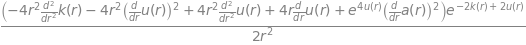

In [18]:
R = RicciScalar.from_riccitensor(Ric)
R.simplify()
R.expr

In [19]:
einst = EinsteinTensor.from_metric(metric)
einst.tensor()

⎡                                      ⎛                                              2⎞    
⎢                                      ⎜                             4⋅u(r) ⎛d       ⎞ ⎟    
⎢                                      ⎜     2                      ℯ      ⋅⎜──(a(r))⎟ ⎟    
⎢                                      ⎜ 2  d            d                  ⎝dr      ⎠ ⎟  -2
⎢                                      ⎜r ⋅───(u(r)) + r⋅──(u(r)) + ───────────────────⎟⋅ℯ  
⎢                                      ⎜     2           dr                  2         ⎟    
⎢                                      ⎝   dr                                          ⎠    
⎢                                      ─────────────────────────────────────────────────────
⎢                                                                        2                  
⎢                                                                       r                   
⎢                                                                     

In [21]:
simplify(einst.tensor())

⎡                                            ⎛       2                      2            2  
⎢                                            ⎜   2  d           2 ⎛d       ⎞         2  d   
⎢                                            ⎜- r ⋅───(k(r)) - r ⋅⎜──(u(r))⎟  + 2.0⋅r ⋅───(u
⎢                                            ⎜       2            ⎝dr      ⎠             2  
⎢                                            ⎝     dr                                  dr   
⎢                                            ───────────────────────────────────────────────
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                     

In [ ]:
#  rm1 = RiemannCurvatureTensor.from_christoffels(ch)
#  rm1.tensor()

In [ ]:
#  weyl = WeylTensor.from_metric(metric)
#  weyl.tensor()

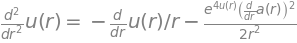

In [28]:
A1 = Eq( diff(u,r,r), expand(solve( Ric.tensor()[0,0].args[1] , diff(u,r,r) )[0]) ) 
A1

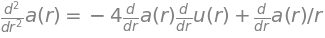

In [86]:
A2 = Eq(diff(a,r,r) ,expand(solve( einst.tensor()[0,2].args[0].args[2].subs(A1.args[0],A1.args[1]) , diff(a,r,r) )[0]) )
A2

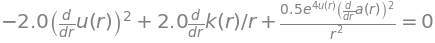

In [87]:
A3 = Eq( simplify(2*einst.tensor())[1,1],0)
A3

In [89]:
vacuumFieldEquations = Matrix([A1,A2,A3])
vacuumFieldEquations

⎡                                                    2         ⎤
⎢                       d           4⋅u(r) ⎛d       ⎞          ⎥
⎢           2           ──(u(r))   ℯ      ⋅⎜──(a(r))⎟          ⎥
⎢          d            dr                 ⎝dr      ⎠          ⎥
⎢         ───(u(r)) = - ──────── - ───────────────────         ⎥
⎢           2              r                  2                ⎥
⎢         dr                               2⋅r                 ⎥
⎢                                                              ⎥
⎢                                             d                ⎥
⎢           2                                 ──(a(r))         ⎥
⎢          d              d        d          dr               ⎥
⎢         ───(a(r)) = - 4⋅──(a(r))⋅──(u(r)) + ────────         ⎥
⎢           2             dr       dr            r             ⎥
⎢         dr                                                   ⎥
⎢                                                              ⎥
⎢                        